# EDA - Milestone 2
---
## Importing Modules

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
import pandas_profiling as pdp

## Method Chaining #1
--- 
This first chain is used to read in and clean the data. 

In [126]:
def load_and_process(url_or_path_to_csv_file):
    # Method Chain 1 (Load data, deal with missing data, and making data readable)
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .rename(columns ={"LOCAL_DATE":"DATE"})
        .sort_values("DATE", ascending=False)
        .reset_index(drop = True)
        
      )
    return df1

In [127]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
df

,DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,2009-10-29 0:00,0.9,0.2,-2.5,1.6,3.1,0.0,1.9,0.0,5.85,...,1.6,2.8,10.1,0.0,6.6,21.0,-2.0,0.0,3.5,8.2
1,2009-10-27 0:00,1.4,3.4,3.8,1.2,2.2,0.0,0.5,0.0,6.40,...,0.1,0.0,12.3,1.2,6.2,0.0,1.9,0.2,8.2,0.0
2,2009-10-26 0:00,6.0,0.0,4.6,0.4,4.2,0.0,3.4,0.0,3.65,...,4.3,1.0,8.8,0.0,9.5,15.8,3.4,0.2,5.3,0.2
3,2009-10-25 0:00,1.5,0.0,2.5,0.0,11.7,19.6,10.9,32.0,5.75,...,5.4,3.6,8.6,0.0,6.3,13.6,1.5,3.2,5.4,1.6
4,2009-10-24 0:00,2.4,9.2,3.3,0.0,6.5,15.4,5.6,17.0,8.35,...,1.2,0.2,9.9,0.0,9.1,0.0,2.4,0.0,5.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1970-01-05 0:00,-20.9,0.3,-22.8,0.3,-11.4,0.0,-12.2,0.0,-17.50,...,-6.1,1.8,-9.5,0.0,-0.6,0.0,-24.5,0.0,-20.3,0.0
13438,1970-01-04 0:00,-16.1,1.3,-17.0,0.5,-11.1,0.0,-14.2,0.0,-21.70,...,-5.6,0.3,-12.0,0.0,-0.3,0.0,-19.2,1.5,-23.1,0.3
13439,1970-01-03 0:00,-7.8,1.0,-9.2,3.0,-9.5,0.5,-11.7,0.0,-17.00,...,-3.4,0.3,-9.5,2.0,1.7,0.5,-13.9,0.5,-20.6,0.3
13440,1970-01-02 0:00,-3.7,0.0,-5.0,2.3,-6.1,0.0,-10.6,0.0,-14.80,...,-1.1,1.3,-12.2,0.0,1.1,1.0,-12.8,0.0,-15.0,0.8


## Method Chaining #2:
---

This method chain is used to regroup the columns to make them more workable. We split the dataset into climate zones that consist of:

- Atlantic Provinces
- Prairie Provinces
- Northern Provinces
- British Columbia 
- Ontario 
- Quebec 

In [128]:
#Method Chain 2 (Creating new columns for different regions of Canada)
def group_columns(df):
    df2 = (
        #create new columns that take mean temperature and percipitation from Atlantic Provinces 
        df
        .assign(TEMPERATURE_ATLANTIC = (df.iloc[:, [5, 7, 17]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_ATLANTIC = (df.iloc[:, [6, 8, 18]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from Prairie provinces 
        .assign(TEMPERATURE_PRAIRIES = (df.iloc[:, [1, 3, 15, 25]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_PRAIRIES = (df.iloc[:, [2, 4, 16, 26]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from cities in Ontario and merge into single column
        .assign(TEMPERATURE_ONTARIO = (df.iloc[:, [11, 19]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_ONTARIO = (df.iloc[:, [12, 20]].mean(axis=1)).round(decimals=1))
        
         #create new columns that take mean temperature and percipitation from cities in Quebec and merge into single column
        .assign(TEMPERATURE_QUEBEC = (df.iloc[:, [9, 13]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_QUEBEC = (df.iloc[:, [10, 14]].mean(axis=1)).round(decimals=1))
        
        #dropping columns that were amalgimated into the means
        .drop(columns = ['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON', 
                         'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX', 'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
                        'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON', 'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
                        'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG', 'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
                        'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
                        'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC'])
        
        #renaming columns to meet new location based naming
        .rename(columns ={"MEAN_TEMPERATURE_VANCOUVER":"TEMPERATURE_BRITISH_COLUMBIA"})
        .rename(columns ={"TOTAL_PRECIPITATION_VANCOUVER":"PRECIPITATION_BRITISH_COLUMBIA"})
        .rename(columns ={"MEAN_TEMPERATURE_WHITEHORSE":"TEMPERATURE_NORTHERN"})
        .rename(columns ={"TOTAL_PRECIPITATION_WHITEHORSE":"PRECIPITATION_NORTHERN"})
    )
        
    return df2

In [129]:
df = group_columns(df)
df

,DATE,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PRECIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PRECIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PRECIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PRECIPITATION_QUEBEC
0,2009-10-29 0:00,6.6,21.0,-2.0,0.0,2.2,0.9,0.2,8.0,8.2,0.1,4.6,0.0
1,2009-10-27 0:00,6.2,0.0,1.9,0.2,0.9,0.0,3.7,1.2,9.2,0.7,4.4,0.2
2,2009-10-26 0:00,9.5,15.8,3.4,0.2,4.0,0.3,5.2,0.3,5.2,0.0,3.5,0.0
3,2009-10-25 0:00,6.3,13.6,1.5,3.2,9.3,18.4,3.2,0.8,7.4,0.0,5.8,0.2
4,2009-10-24 0:00,9.1,0.0,2.4,0.0,4.4,10.9,3.7,2.3,8.8,2.7,5.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1970-01-05 0:00,-0.6,0.0,-24.5,0.0,-9.9,0.6,-21.0,0.2,-11.6,0.2,-17.2,0.9
13438,1970-01-04 0:00,-0.3,0.0,-19.2,1.5,-10.3,0.1,-19.3,0.5,-14.6,0.0,-19.4,0.0
13439,1970-01-03 0:00,1.7,0.5,-13.9,0.5,-8.2,0.3,-13.4,1.4,-12.4,1.0,-16.6,0.0
13440,1970-01-02 0:00,1.1,1.0,-12.8,0.0,-5.9,0.4,-9.0,1.0,-12.5,0.0,-15.4,0.0


### Looking into the data set:
---

In [153]:
df.describe()

,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PRECIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PRECIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PRECIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PRECIPITATION_QUEBEC,YEAR
count,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000
mean,10.211657,3.191794,-0.447999,0.738476,5.577005,3.815132,3.052336,1.192315,7.023962,2.377637,5.444852,2.968115,1988.836036
std,5.764915,6.555784,12.744257,1.993064,9.374004,6.039745,12.402578,2.406615,11.343336,4.833853,11.998804,5.836043,11.714052
min,-11.500000,0.000000,-46.700000,0.000000,-21.700000,0.000000,-36.600000,0.000000,-27.100000,0.000000,-30.000000,0.000000,1970.000000
25%,5.900000,0.000000,-8.200000,0.000000,-1.500000,0.100000,-5.900000,0.000000,-1.675000,0.000000,-3.600000,0.000000,1979.000000
50%,10.000000,0.000000,1.800000,0.000000,5.700000,1.300000,4.800000,0.200000,7.600000,0.200000,6.400000,0.300000,1988.000000
75%,15.000000,3.500000,9.800000,0.400000,13.600000,4.900000,13.900000,1.300000,17.000000,2.500000,15.800000,3.200000,2000.000000
max,28.400000,91.600000,23.900000,44.900000,24.300000,80.600000,25.400000,34.500000,30.400000,76.100000,28.600000,81.600000,2009.000000


##### Pandas Profiling
I wanted to use Pandas Profile to look for possible correlations in the data and see what if there were any issues. I placed the # symbol infront of dfprofile so it doesn't run automatically (because it takes a long time). 

In [156]:
dfprofile = pdp.ProfileReport(df)
#dfprofile

## Splitting Up the Dataset
--- 

My goal for my EDA is to be able to work out the average percipitation per year in each climate zone and make it in a graphable form. To do this I needed to split up the dataset by location and group it by year. Some of this code was borrowed from my team member Nadine. 

In [130]:
#Adding Year Column
df = df.assign(DATE = lambda x : x.DATE)
df["DATE"] = pd.to_datetime(df["DATE"], utc = True).dt.date
df.sort_values(by=['DATE'], inplace=True)
df = df.assign(YEAR = lambda x : x.DATE)
df["YEAR"] = pd.to_datetime(df["YEAR"], utc = True).dt.year
df = df[df['YEAR'] < 2020]
df

,DATE,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PRECIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PRECIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PRECIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PRECIPITATION_QUEBEC,YEAR
13441,1970-01-01,2.2,0.0,-1.4,0.0,-7.3,0.5,-10.4,1.0,-14.2,0.0,-17.2,0.0,1970
13440,1970-01-02,1.1,1.0,-12.8,0.0,-5.9,0.4,-9.0,1.0,-12.5,0.0,-15.4,0.0,1970
13439,1970-01-03,1.7,0.5,-13.9,0.5,-8.2,0.3,-13.4,1.4,-12.4,1.0,-16.6,0.0,1970
13438,1970-01-04,-0.3,0.0,-19.2,1.5,-10.3,0.1,-19.3,0.5,-14.6,0.0,-19.4,0.0,1970
13437,1970-01-05,-0.6,0.0,-24.5,0.0,-9.9,0.6,-21.0,0.2,-11.6,0.2,-17.2,0.9,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2009-10-24,9.1,0.0,2.4,0.0,4.4,10.9,3.7,2.3,8.8,2.7,5.4,18.0,2009
3,2009-10-25,6.3,13.6,1.5,3.2,9.3,18.4,3.2,0.8,7.4,0.0,5.8,0.2,2009
2,2009-10-26,9.5,15.8,3.4,0.2,4.0,0.3,5.2,0.3,5.2,0.0,3.5,0.0,2009
1,2009-10-27,6.2,0.0,1.9,0.2,0.9,0.0,3.7,1.2,9.2,0.7,4.4,0.2,2009


In [131]:
#Splitting Up the Locations
britishcolumbia = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_BRITISH_COLUMBIA')
northern = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_NORTHERN')
atlantic = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_ATLANTIC')
praries = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_PRAIRIES')
ontario = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_ONTARIO')
quebec = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_QUEBEC')

# Visualizations:
## British Columbia: 
--- 

In [157]:
#Grouping the data by year and then taking the average of each year
britishcolumbia = britishcolumbia.assign(YEAR = lambda x : x.DATE)
britishcolumbia["YEAR"] = pd.to_datetime(britishcolumbia["YEAR"], utc = True).dt.year
britishcolumbia = britishcolumbia[britishcolumbia['YEAR'] < 2020]
britishcolumbia.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,2.397260
1971,3.656986
1972,3.398361
1973,2.739178
1974,3.420274
1975,3.616712
1976,2.754918
1977,2.828219
1978,2.785753


#### Visulizing the BC Data with a barplot and a lineplot: 
---

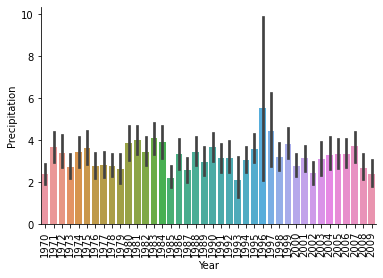

In [158]:
sns.barplot(data = britishcolumbia, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

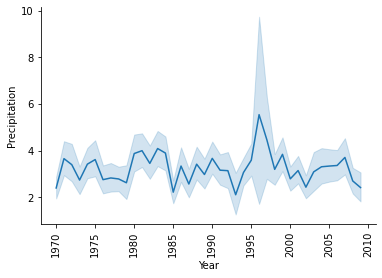

In [159]:
sns.lineplot(data = britishcolumbia, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

## Northern Provinces:
---

In [160]:
#Grouping the data by year and then taking the average of each year
northern = northern.assign(YEAR = lambda x : x.DATE)
northern["YEAR"] = pd.to_datetime(northern["YEAR"], utc = True).dt.year
northern = northern[northern['YEAR'] < 2020]
northern.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,0.670959
1971,0.725205
1972,0.801639
1973,0.590685
1974,1.005753
1975,0.850411
1976,0.601093
1977,0.869863
1978,0.571507


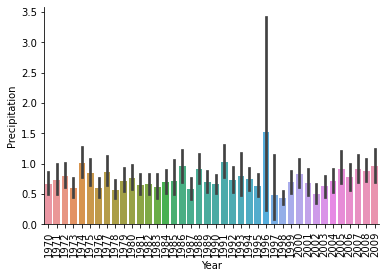

In [161]:
sns.barplot(data = northern, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

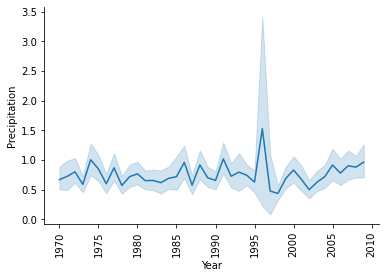

In [162]:
sns.lineplot(data = northern, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

## Atlantic Provinces:
---

In [163]:
#Grouping the data by year and then taking the average of each year
atlantic = atlantic.assign(YEAR = lambda x : x.DATE)
atlantic["YEAR"] = pd.to_datetime(atlantic["YEAR"], utc = True).dt.year
atlantic = atlantic[atlantic['YEAR'] < 2020]
atlantic.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,3.971781
1971,4.106027
1972,4.429235
1973,3.744384
1974,3.870685
1975,3.723288
1976,3.938525
1977,4.007397
1978,3.470959


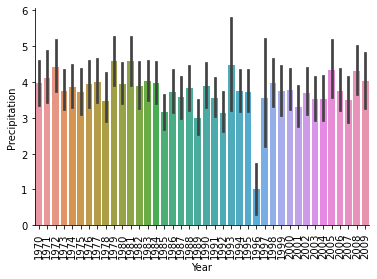

In [164]:
sns.barplot(data = atlantic, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

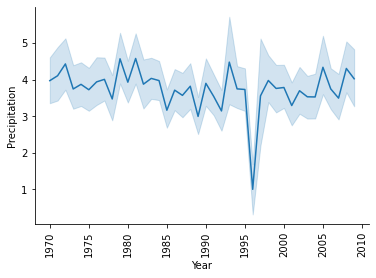

In [165]:
sns.lineplot(data = atlantic, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

## Prarie Provinces:
---

In [166]:
#Grouping the data by year and then taking the average of each year
praries = praries.assign(YEAR = lambda x : x.DATE)
praries["YEAR"] = pd.to_datetime(praries["YEAR"], utc = True).dt.year
praries = praries[praries['YEAR'] < 2020]
praries.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,1.244932
1971,1.177260
1972,1.211202
1973,1.339178
1974,1.211507
1975,1.223014
1976,1.078962
1977,1.309863
1978,1.281644


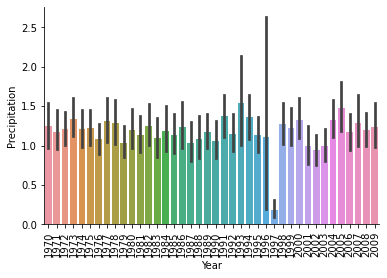

In [167]:
sns.barplot(data = praries, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

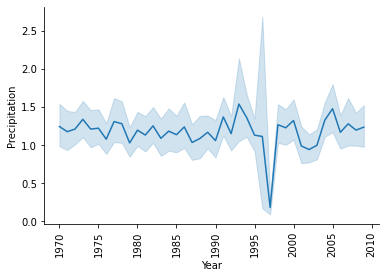

In [168]:
sns.lineplot(data = praries, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

## Ontario:
---

In [169]:
#Grouping the data by year and then taking the average of each year
ontario = ontario.assign(YEAR = lambda x : x.DATE)
ontario["YEAR"] = pd.to_datetime(ontario["YEAR"], utc = True).dt.year
ontario = ontario[ontario['YEAR'] < 2020]
ontario.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,2.236164
1971,2.187123
1972,2.763934
1973,2.590411
1974,2.244658
1975,2.295616
1976,2.287978
1977,2.715068
1978,2.119452


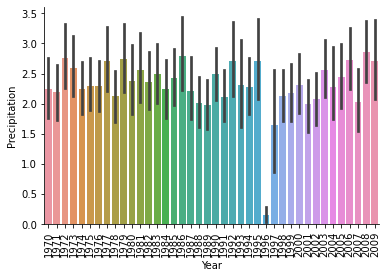

In [170]:
sns.barplot(data = ontario, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

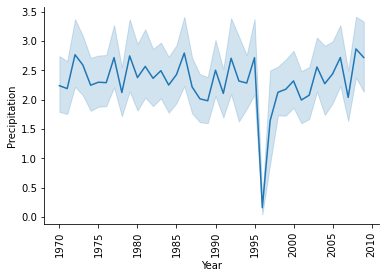

In [171]:
sns.lineplot(data = ontario, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

## Quebec:
---

In [172]:
#Grouping the data by year and then taking the average of each year
quebec = quebec.assign(YEAR = lambda x : x.DATE)
quebec["YEAR"] = pd.to_datetime(quebec["YEAR"], utc = True).dt.year
quebec = quebec[quebec['YEAR'] < 2020]
quebec.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1970,2.639452
1971,2.847945
1972,3.481967
1973,3.577534
1974,2.978630
1975,3.318904
1976,3.498087
1977,2.934247
1978,2.701370


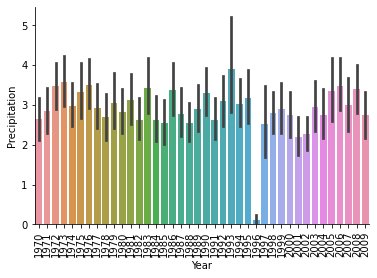

In [173]:
sns.barplot(data = quebec, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

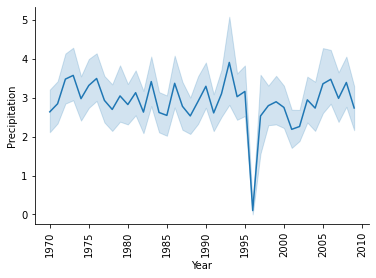

In [174]:
sns.lineplot(data = quebec, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()